In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy

In [2]:
from scipy.interpolate import BSpline

from cvxopt import matrix, solvers

In [3]:
import seaborn as sns

In [4]:

# test code

In [5]:
import sys
from importlib import reload
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/')
sys.path.append('/mnt/home/szheng/projects/util_code/')

import plot_helper as ph

In [6]:
import unimodal_nmf as unmf
reload(unmf)

<module 'unimodal_nmf' from '/mnt/home/szheng/projects/nmf_analysis/unimodal_nmf.py'>

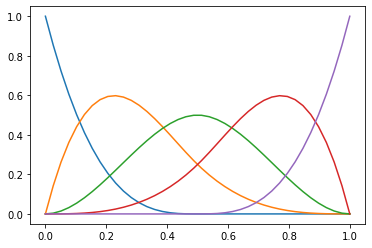

In [16]:
n_basis=5
basis = unmf.get_basis(n_basis,n_pt=40,degree=3,do_plot=True)      

In [21]:
n_components = 5
f = basis
n_pt = 40
I_k = np.eye(n_components)
I_Kf =np.kron(I_k,f)
M = np.tile(np.eye(n_pt),[n_components,n_components])
cross_penalty_mixing = I_Kf.T.dot(M).dot(I_Kf)

In [32]:
beta=np.random.normal(size=(n_components,n_components))

In [34]:
vecbeta = beta.reshape(-1,order='F')

In [37]:
w = f.dot(beta)

In [39]:
np.sum(w.T.dot(w))

96.46321971606031

In [35]:
vecbeta.T.dot(cross_penalty_mixing).dot(vecbeta)

96.4632197160603

In [40]:
beta = np.array([[0.5,1.,0.25,0.,0.],[0.,0.,0.,1.,0.2],np.zeros(5),np.zeros(5),np.zeros(5)]).T
n_basis = beta.shape[0]

vecbeta = beta.reshape(-1,order='F')
W = basis.dot(beta)
k = beta.shape[1]
p=20
H = np.abs(np.random.normal(size=(k,p)))
X = W.dot(H)

In [48]:
beta

array([[0.5 , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.  , 0.  , 0.  ]])

In [105]:
aa=np.ones((4,5))

In [141]:
reload(unmf)
n_basis = 10
f,beta_hat,H_hat,W_hat,loss_history = unmf.do_unimodal_nmf(X,n_components=n_basis,lam_beta=1.,lam_h=1.,
                    n_basis=n_basis, n_pt=40, degree=3, mode_ind_l=None,
                    n_iter_max = 2000, rtol= 1e-3,do_plot_basis=False,
                    verbose=True
                    )

iter0--tot: 36.10850, recon: 7.66337, reg_beta: 2.68231, reg_H: 25.76281
iter1--tot: 27.92335, recon: 2.83041, reg_beta: 3.90647, reg_H: 21.18647
iter2--tot: 25.12162, recon: 1.95987, reg_beta: 4.59948, reg_H: 18.56228
iter3--tot: 23.42873, recon: 1.46562, reg_beta: 5.19012, reg_H: 16.77299
iter4--tot: 22.31306, recon: 1.20830, reg_beta: 5.66838, reg_H: 15.43639
iter5--tot: 21.52341, recon: 1.05450, reg_beta: 6.06308, reg_H: 14.40583
iter6--tot: 20.94492, recon: 0.94827, reg_beta: 6.40611, reg_H: 13.59054
iter7--tot: 20.51145, recon: 0.87068, reg_beta: 6.70648, reg_H: 12.93428
iter8--tot: 20.18275, recon: 0.81139, reg_beta: 6.97403, reg_H: 12.39733
iter9--tot: 19.93172, recon: 0.76535, reg_beta: 7.21402, reg_H: 11.95234
iter10--tot: 19.73881, recon: 0.72908, reg_beta: 7.43005, reg_H: 11.57968
iter11--tot: 19.59025, recon: 0.70082, reg_beta: 7.62533, reg_H: 11.26410
iter12--tot: 19.47585, recon: 0.67759, reg_beta: 7.80312, reg_H: 10.99514
iter13--tot: 19.38700, recon: 0.65861, reg_beta:

iter132--tot: 18.99451, recon: 0.53668, reg_beta: 9.22818, reg_H: 9.22964
iter133--tot: 18.99447, recon: 0.53668, reg_beta: 9.22820, reg_H: 9.22960
iter134--tot: 18.99444, recon: 0.53667, reg_beta: 9.22821, reg_H: 9.22957
iter135--tot: 18.99441, recon: 0.53666, reg_beta: 9.22822, reg_H: 9.22953
iter136--tot: 18.99438, recon: 0.53666, reg_beta: 9.22823, reg_H: 9.22949
iter137--tot: 18.99435, recon: 0.53665, reg_beta: 9.22824, reg_H: 9.22946
iter138--tot: 18.99432, recon: 0.53665, reg_beta: 9.22825, reg_H: 9.22943
iter139--tot: 18.99429, recon: 0.53664, reg_beta: 9.22826, reg_H: 9.22939
iter140--tot: 18.99427, recon: 0.53664, reg_beta: 9.22827, reg_H: 9.22936
iter141--tot: 18.99424, recon: 0.53664, reg_beta: 9.22827, reg_H: 9.22933
iter142--tot: 18.99421, recon: 0.53664, reg_beta: 9.22828, reg_H: 9.22929
iter143--tot: 18.99418, recon: 0.53663, reg_beta: 9.22829, reg_H: 9.22926
iter144--tot: 18.99416, recon: 0.53663, reg_beta: 9.22830, reg_H: 9.22922
iter145--tot: 18.99413, recon: 0.53663

iter253--tot: 18.99259, recon: 0.53657, reg_beta: 9.22795, reg_H: 9.22807
iter254--tot: 18.99258, recon: 0.53657, reg_beta: 9.22794, reg_H: 9.22807
iter255--tot: 18.99258, recon: 0.53657, reg_beta: 9.22794, reg_H: 9.22806
iter256--tot: 18.99257, recon: 0.53657, reg_beta: 9.22794, reg_H: 9.22806
iter257--tot: 18.99256, recon: 0.53657, reg_beta: 9.22794, reg_H: 9.22806
iter258--tot: 18.99255, recon: 0.53657, reg_beta: 9.22793, reg_H: 9.22805
iter259--tot: 18.99255, recon: 0.53657, reg_beta: 9.22793, reg_H: 9.22805
iter260--tot: 18.99254, recon: 0.53657, reg_beta: 9.22793, reg_H: 9.22804
iter261--tot: 18.99253, recon: 0.53657, reg_beta: 9.22792, reg_H: 9.22804
iter262--tot: 18.99253, recon: 0.53657, reg_beta: 9.22792, reg_H: 9.22804
iter263--tot: 18.99252, recon: 0.53657, reg_beta: 9.22792, reg_H: 9.22803
iter264--tot: 18.99252, recon: 0.53657, reg_beta: 9.22792, reg_H: 9.22803
iter265--tot: 18.99251, recon: 0.53657, reg_beta: 9.22791, reg_H: 9.22802
iter266--tot: 18.99250, recon: 0.53657

iter377--tot: 18.99213, recon: 0.53656, reg_beta: 9.22779, reg_H: 9.22779
iter378--tot: 18.99212, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22779
iter379--tot: 18.99212, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter380--tot: 18.99212, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter381--tot: 18.99212, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter382--tot: 18.99212, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter383--tot: 18.99212, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter384--tot: 18.99211, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter385--tot: 18.99211, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter386--tot: 18.99211, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter387--tot: 18.99211, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter388--tot: 18.99211, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22778
iter389--tot: 18.99211, recon: 0.53656, reg_beta: 9.22778, reg_H: 9.22777
iter390--tot: 18.99210, recon: 0.53656

iter499--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter500--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter501--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter502--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter503--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter504--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter505--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter506--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter507--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter508--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter509--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter510--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter511--tot: 18.99200, recon: 0.53655, reg_beta: 9.22774, reg_H: 9.22771
iter512--tot: 18.99200, recon: 0.53655

iter620--tot: 18.99196, recon: 0.53655, reg_beta: 9.22772, reg_H: 9.22769
iter621--tot: 18.99196, recon: 0.53655, reg_beta: 9.22772, reg_H: 9.22769
iter622--tot: 18.99196, recon: 0.53655, reg_beta: 9.22772, reg_H: 9.22769
iter623--tot: 18.99196, recon: 0.53655, reg_beta: 9.22772, reg_H: 9.22769
iter624--tot: 18.99196, recon: 0.53656, reg_beta: 9.22772, reg_H: 9.22769
iter625--tot: 18.99196, recon: 0.53656, reg_beta: 9.22772, reg_H: 9.22769
iter626--tot: 18.99196, recon: 0.53656, reg_beta: 9.22772, reg_H: 9.22769
iter627--tot: 18.99196, recon: 0.53656, reg_beta: 9.22772, reg_H: 9.22769
iter628--tot: 18.99196, recon: 0.53656, reg_beta: 9.22772, reg_H: 9.22769
iter629--tot: 18.99196, recon: 0.53656, reg_beta: 9.22771, reg_H: 9.22769
iter630--tot: 18.99196, recon: 0.53656, reg_beta: 9.22771, reg_H: 9.22769
iter631--tot: 18.99196, recon: 0.53656, reg_beta: 9.22771, reg_H: 9.22769
iter632--tot: 18.99196, recon: 0.53656, reg_beta: 9.22772, reg_H: 9.22769
success=True


In [118]:
unmf.get_reconstruction_error(X,f,beta,H)

0.0

In [143]:
np.set_printoptions(suppress=True,precision=2)
beta_hat

array([[0.01, 0.01, 0.72, 0.09, 0.01, 0.01, 0.01, 0.13, 0.  , 0.  ],
       [0.  , 0.01, 0.95, 0.11, 0.01, 0.01, 0.01, 0.15, 0.  , 0.  ],
       [0.  , 0.01, 1.19, 0.14, 0.01, 0.01, 0.02, 0.18, 0.  , 0.  ],
       [0.  , 0.01, 1.13, 0.14, 0.01, 0.01, 0.02, 0.21, 0.  , 0.  ],
       [0.  , 0.01, 0.8 , 0.1 , 0.01, 0.01, 0.02, 0.34, 0.  , 0.  ],
       [0.  , 0.01, 0.57, 0.08, 0.01, 0.01, 0.03, 0.67, 0.  , 0.  ],
       [0.  , 0.01, 0.44, 0.08, 0.01, 0.01, 0.04, 1.1 , 0.  , 0.  ],
       [0.  , 0.01, 0.33, 0.07, 0.01, 0.01, 0.04, 1.1 , 0.01, 0.  ],
       [0.  , 0.  , 0.2 , 0.04, 0.01, 0.01, 0.03, 0.7 , 0.01, 0.  ],
       [0.  , 0.  , 0.09, 0.02, 0.  , 0.  , 0.01, 0.32, 0.  , 0.  ]])

In [140]:
np.corrcoef(W_hat.T)

array([[ 1.  ,  0.9 ,  0.58,  0.73, -0.29],
       [ 0.9 ,  1.  ,  0.63,  0.8 , -0.35],
       [ 0.58,  0.63,  1.  ,  0.91, -0.74],
       [ 0.73,  0.8 ,  0.91,  1.  , -0.76],
       [-0.29, -0.35, -0.74, -0.76,  1.  ]])

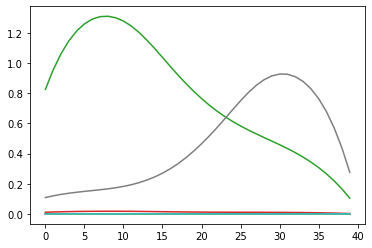

In [142]:
plt.plot(W_hat)

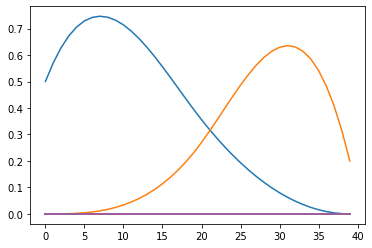

In [121]:
plt.plot(W)

In [35]:
beta

array([[7.32682714e-01, 2.06792463e-01],
       [7.32682715e-01, 2.06792462e-01],
       [7.32682696e-01, 1.68839487e-01],
       [7.32682672e-01, 8.86964667e-02],
       [6.03904876e-01, 3.00231355e-08]])

# test on real data

In [145]:
sys.path.append('/mnt/home/szheng/projects/place_variability/code/thomas_18_data')
import fr_map_thomas_all_sess as fmtas
reload(fmtas)

<module 'fr_map_thomas_all_sess' from '/mnt/home/szheng/projects/place_variability/code/thomas_18_data/fr_map_thomas_all_sess.py'>

In [218]:
import get_thomas_cell_metrics as gtcm
reload(gtcm)

<module 'get_thomas_cell_metrics' from '/mnt/home/szheng/projects/place_variability/code/thomas_18_data/get_thomas_cell_metrics.py'>

In [146]:
%%time
fr_map_all = fmtas.main(force_reload=False,load_only=True,dosave=False)

/mnt/home/szheng/ceph/ad/thomas_data/180301_DG_CA3_CA1/fr_map_all_mask_False.p exists; loading---
CPU times: user 437 ms, sys: 2.41 s, total: 2.84 s
Wall time: 8.48 s


In [215]:
fr_map_trial_df_all = fr_map_all['fr_map_trial_df_all']

occu_map = fr_map_all['occu_map_all']

frmap = fr_map_all['fr_map_all']
fr_map_trial_all = fr_map_all['fr_map_trial_all']

In [237]:
# reshape fr_map_trial_df_all to make it easier to work with
fr_map_trial_df_all_day =fr_map_trial_df_all.unstack(level=2).swaplevel(0,1,axis=1).sort_index(axis=1) # day in column



In [221]:
reload(gtcm)
per_cell_metrics=gtcm.get_variability_metrics(frmap,occu_map,fr_map_trial_df_all)

/mnt/home/szheng/projects/util_code/place_cell_analysis.py:211: PerformanceWarning: indexing past lexsort depth may impact performance.
  frmap_one=frmap.loc[kk].dropna(axis=1)
/mnt/home/szheng/projects/util_code/place_cell_analysis.py:203: RuntimeWarning: invalid value encountered in true_divide
  div = (fr_map_v / fr_mean[:,None])


In [156]:
fr_map_trial_df_all_per_uid=fr_map_trial_df_all.unstack(level=(2,3)).swaplevel(0,1,axis=1).swaplevel(1,2,axis=1).sort_index(axis=1).dropna(axis=1,how='all')



In [161]:
gpb = fr_map_trial_df_all_per_uid.groupby(level=(0,1,2),sort=False)
for k,val in gpb:
    val

In [ ]:
row=per_cell_metrics.query('si>1').sample(1)
print(row)
region,exp,day,isnovel,uid=ind=row.index[0]

In [246]:
X_df = fr_map_trial_df_all_day.loc[(region,exp,isnovel,uid),:].dropna(axis=1,how='all')
X = X_df.fillna(0).values

In [338]:
reload(unmf)

<module 'unimodal_nmf' from '/mnt/home/szheng/projects/nmf_analysis/unimodal_nmf.py'>

In [412]:
# X = val.fillna(0).values
n_pt = X.shape[0]
n_basis = 20
f,beta_hat,H_hat,W_hat,loss_history = unmf.do_unimodal_nmf(X,n_components=n_basis,lam_beta=1.,lam_h=0.1,lam_beta_cross=.1,
                    n_basis=n_basis, n_pt=n_pt, degree=3, mode_ind_l=None,
                    n_iter_max = 1000, rtol= 1e-3,do_plot_basis=False,norm_H='max',
                    verbose=True
                    )

ma = W_hat.sum(axis=0) > W_hat.sum(axis=0).max() * 0.1
W_hat_ma = W_hat[:,ma]
H_hat_ma = H_hat[ma,:]


iter0--tot: 6.47697, recon: 4.85611, reg_beta: 0.11855, reg_H: 1.50193, reg_beta_cross: 0.00037
iter1--tot: 4.43792, recon: 2.45326, reg_beta: 0.39667, reg_H: 1.58617, reg_beta_cross: 0.00182
iter2--tot: 3.67461, recon: 1.41198, reg_beta: 0.57787, reg_H: 1.68404, reg_beta_cross: 0.00073
iter3--tot: 3.50930, recon: 1.20281, reg_beta: 0.63783, reg_H: 1.66814, reg_beta_cross: 0.00052
iter4--tot: 3.47882, recon: 1.17138, reg_beta: 0.64908, reg_H: 1.65803, reg_beta_cross: 0.00032
iter5--tot: 3.46706, recon: 1.16229, reg_beta: 0.65057, reg_H: 1.65394, reg_beta_cross: 0.00027
iter6--tot: 3.46420, recon: 1.16126, reg_beta: 0.65163, reg_H: 1.65108, reg_beta_cross: 0.00023
iter7--tot: 3.46406, recon: 1.16246, reg_beta: 0.65238, reg_H: 1.64900, reg_beta_cross: 0.00022
iter8--tot: 3.46461, recon: 1.16353, reg_beta: 0.65289, reg_H: 1.64799, reg_beta_cross: 0.00020
success=True


[Text(0.5, 58.7222222222222, 'Position'), Text(53.722222222222214, 0.5, 'W')]

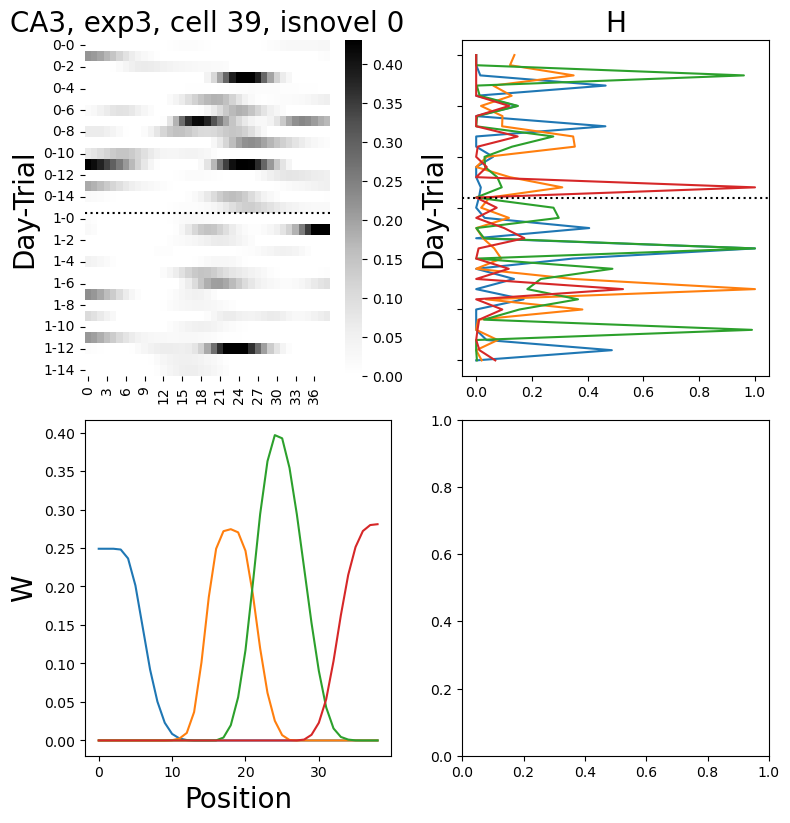

In [419]:
reload(ph)
fig,axs = plt.subplots(2,2,figsize=(8,8))
ax=axs[0,0]
fig,ax=ph.heatmap(X_df.T,ax=ax,vmax_quantile=0.99)
ph.plot_day_on_heatmap(X_df,level=0,axis=1,ax=ax)
ax.set(ylabel='Day-Trial',title=f'{region}, exp{exp}, cell {uid}, isnovel {isnovel}',xlabel='')

ax=axs[0,1]
ax.plot(H_hat_ma.T,np.arange(H_hat.shape[1]))
ph.plot_day_on_heatmap(X_df,level=0,axis=1,ax=ax)
ax.set(ylabel='Day-Trial',yticklabels=[],title='H')


ax=axs[1,0]
ax.plot(W_hat_ma)
plt.tight_layout()
ax.set(xlabel='Position',ylabel='W')

[Text(0.5, 58.7222222222222, 'Position'), Text(53.722222222222214, 0.5, 'W')]

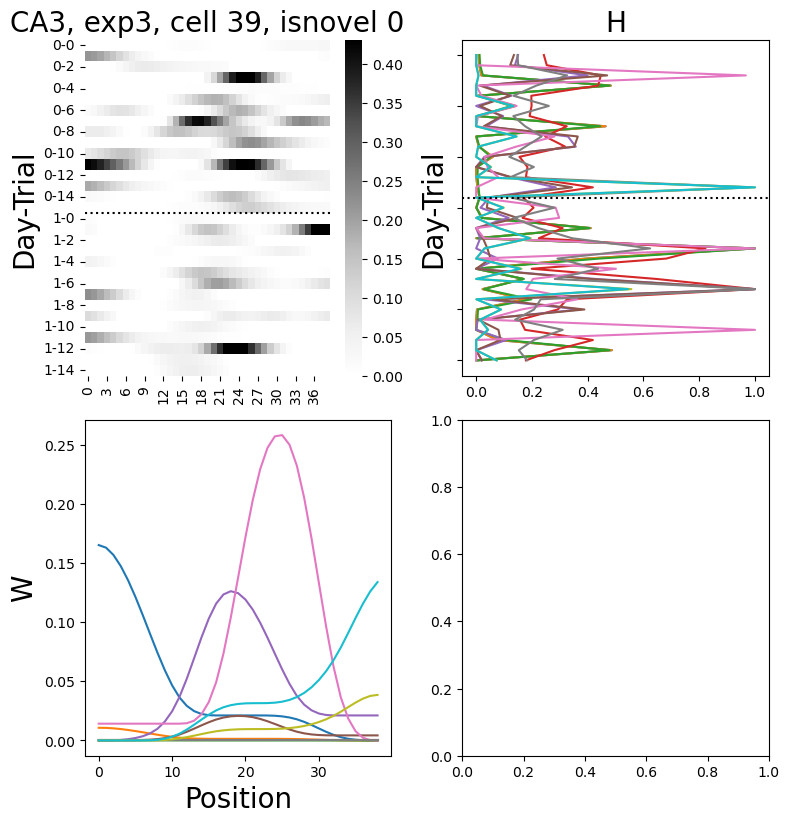

In [315]:
reload(ph)
fig,axs = plt.subplots(2,2,figsize=(8,8))
ax=axs[0,0]
fig,ax=ph.heatmap(X_df.T,ax=ax)
ph.plot_day_on_heatmap(X_df,level=0,axis=1,ax=ax)
ax.set(ylabel='Day-Trial',title=f'{region}, exp{exp}, cell {uid}, isnovel {isnovel}',xlabel='')

ax=axs[0,1]
ax.plot(H_hat.T,np.arange(H_hat.shape[1]))
ph.plot_day_on_heatmap(X_df,level=0,axis=1,ax=ax)
ax.set(ylabel='Day-Trial',yticklabels=[],title='H')


ax=axs[1,0]
ax.plot(W_hat)
plt.tight_layout()
ax.set(xlabel='Position',ylabel='W')

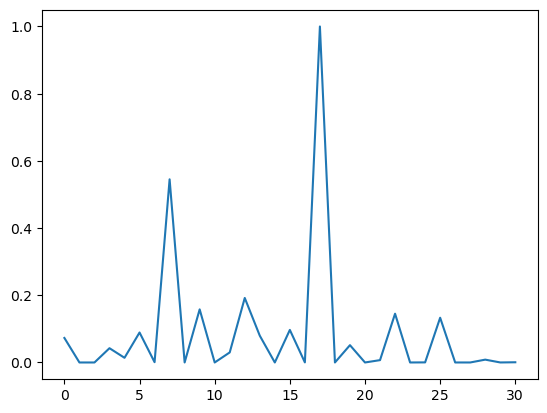

In [306]:
plt.plot(H_hat[])

In [199]:
toplot=val.droplevel((0,1,2)).T.dropna(axis=0,how='all').dropna(axis=1)

In [231]:
row=per_cell_metrics.query('si>1').sample(1)
print(row)
region,exp,day,isnovel,uid=ind=row.index[0]

                    si     fr_cv   mean_fr
CA3 3 1 0 39  1.061254  1.029366  0.032138


In [233]:
toplot = fr_map_trial_df_all.loc[(region,exp,slice(None),isnovel,uid)].dropna(axis=1,how='all')

0         1         2         3    4         5         6    7   \
0 0   0.0  0.217091  0.000000  0.000000  0.0  0.000000  0.013834  0.0   
  1   0.0  0.209080  0.000000  0.000000  0.0  0.000000  0.026486  0.0   
  2   0.0  0.193559  0.000000  0.000000  0.0  0.000000  0.045440  0.0   
  3   0.0  0.171598  0.000000  0.000000  0.0  0.000000  0.064505  0.0   
  4   0.0  0.144888  0.005547  0.000000  0.0  0.000000  0.079452  0.0   
...   ...       ...       ...       ...  ...       ...       ...  ...   
1 34  0.0  0.254561  0.000000  0.025957  0.0  0.000000  0.034784  0.0   
  35  0.0  0.348450  0.000000  0.011568  0.0  0.000000  0.051074  0.0   
  36  0.0  0.446907  0.000000  0.000000  0.0  0.003197  0.068418  0.0   
  37  0.0  0.531873  0.000000  0.000000  0.0  0.005620  0.083179  0.0   
  38  0.0  0.582201  0.000000  0.000000  0.0  0.006831  0.091774  0.0   

            8         9         10        11   12        13        14   15  
0 0   0.062487  0.000000  0.068469  0.431871  0.0  0.188645  0.021928  0.0  
  1   0.064606  0.000000  0.080851  0.412857  0.0  0.177424  0.019275  0.0  
  2   0.063614  0.000000  0.099500  0.380649  0.0  0.158832  0.014853  0.0  
  3   0.055195  0.000000  0.119174  0.341611  0.0  0.136949  0.009518  0.0  
  4   0.039803  0.000000  0.136165  0.299514  0.0  0.114354  0.003766  0.0  
...        ...       ...       ...       ...  ...       ...       ...  ...  
1 34  0.000000  0.025261  0.000000  0.000000  0.0  0.000000  0.000000  NaN  
  35  0.000000  0.033134  0.000000  0.000000  0.0  0.000000  0.000000  NaN  
  36  0.000000  0.046226  0.000000  0.000000  0.0  0.000000  0.000000  NaN  
  37  0.000000  0.059347  0.000000  0.000000  0.0  0.000000  0.000000  NaN  
  38  0.000000  0.067543  0.000000  0.000000  0.0  0.000000  0.000000  NaN  

[78 rows x 16 columns]

<Axes: ylabel='None-None-None'>

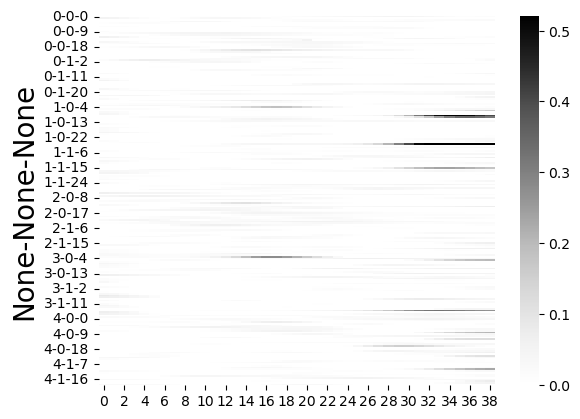

In [212]:
vmax=np.quantile(toplot.values,0.999)
sns.heatmap(toplot,cmap='Greys',vmax=vmax,vmin=0.)

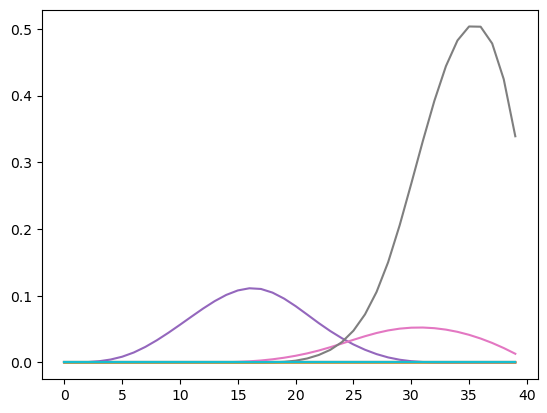

In [176]:
plt.plot(W_hat)

In [179]:
np.corrcoef(W_hat.T)

array([[ 1.  ,  0.78,  0.58,  0.43,  0.2 , -0.37, -0.73, -0.79, -0.76,
        -0.99],
       [ 0.78,  1.  ,  0.89,  0.64,  0.35, -0.19, -0.71, -0.77, -0.75,
        -0.84],
       [ 0.58,  0.89,  1.  ,  0.83,  0.56, -0.  , -0.66, -0.73, -0.71,
        -0.67],
       [ 0.43,  0.64,  0.83,  1.  ,  0.87,  0.07, -0.72, -0.64, -0.6 ,
        -0.5 ],
       [ 0.2 ,  0.35,  0.56,  0.87,  1.  ,  0.45, -0.51, -0.57, -0.54,
        -0.28],
       [-0.37, -0.19, -0.  ,  0.07,  0.45,  1.  ,  0.41, -0.11, -0.18,
         0.28],
       [-0.73, -0.71, -0.66, -0.72, -0.51,  0.41,  1.  ,  0.73,  0.63,
         0.73],
       [-0.79, -0.77, -0.73, -0.64, -0.57, -0.11,  0.73,  1.  ,  0.99,
         0.84],
       [-0.76, -0.75, -0.71, -0.6 , -0.54, -0.18,  0.63,  0.99,  1.  ,
         0.83],
       [-0.99, -0.84, -0.67, -0.5 , -0.28,  0.28,  0.73,  0.84,  0.83,
         1.  ]])

In [5]:
def get_basis(n_basis,n_pt=40,degree=3,do_plot=True,ax=None):
    '''
    basis: n_pt x n_basis 
    '''
    k=degree
    n=n_basis
    n_middle = n+k+1 - 2*(k)
    xs = np.linspace(0,1,n_pt)
    t = np.concatenate([np.zeros(k),np.linspace(0,1,n_middle),np.ones(k)])

    
    basis = []
    
    for i in range(n):
        c=np.zeros(n)
        c[i] = 1
        spline=BSpline(t,c,k)
        y=spline(xs)
        basis.append(y)
    basis = np.array(basis).T
    if do_plot:
        if ax is None:
            fig,ax=plt.subplots()        
        ax.plot(xs,basis)
    
    return basis
    



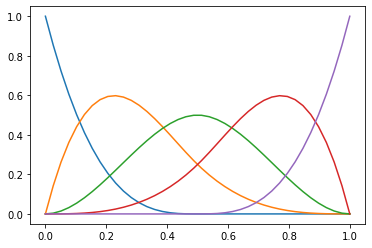

In [6]:
n_basis = 5
n_pt = 40
basis=get_basis(n_basis=n_basis,n_pt=n_pt)


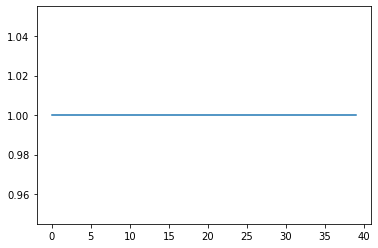

In [189]:
plt.plot(basis.sum(axis=1))

In [7]:
import numpy as np
from cvxopt import matrix, solvers



# rank 1 optimization

In [9]:
n=20
p=100
k=2
W = np.abs(np.random.normal(size=(n,k)))
H = np.abs(np.random.normal(size=(k,p)))


X = W.dot(H)


In [40]:
hT = H[0,:]
q=qT = -2*hT.dot(X.T)
P = np.eye(n) * hT.dot(hT.T)

G = -np.eye(n)
h = np.zeros(n)

P = matrix(P)
q = matrix(q)
G = matrix(G)
h = matrix(h)

sol = solvers.qp(P,q,G,h)


     pcost       dcost       gap    pres   dres
 0: -9.5340e+03 -9.7326e+03  2e+02  0e+00  2e-02
 1: -9.5347e+03 -9.5368e+03  2e+00  3e-15  2e-04
 2: -9.5347e+03 -9.5347e+03  2e-02  3e-15  2e-06
 3: -9.5347e+03 -9.5347e+03  2e-04  2e-15  2e-08
Optimal solution found.


In [24]:
from sklearn.decomposition import NMF

In [46]:
nmf = NMF(n_components=1,max_iter=100000)

What=nmf.fit_transform(X)
Hhat = nmf.components_

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 100000 reached. Increase it to improve convergence.
  warnings.warn(


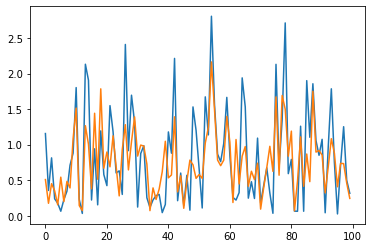

In [47]:
plt.plot(H[0])

plt.plot(Hhat[0])

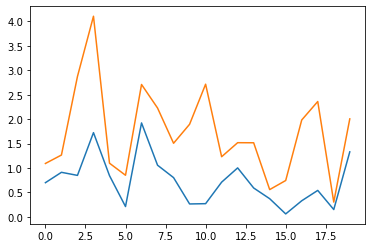

In [48]:
plt.plot(W[:,0])

plt.plot(What[:,0])

In [41]:
w_hat = np.array(sol['x'])

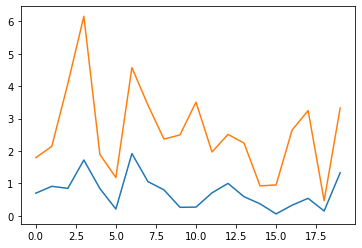

In [42]:
plt.plot(W[:,0])
plt.plot(w_hat)

In [23]:
W[:,[0]].dot(H[[0],:])

array([[0.80867423, 0.24842876, 0.56930389, ..., 0.87613178, 0.34921536,
        0.22037221],
       [1.05397233, 0.32378556, 0.7419929 , ..., 1.14189202, 0.45514413,
        0.28721852],
       [0.98129937, 0.30146006, 0.69083139, ..., 1.06315687, 0.42376126,
        0.26741437],
       ...,
       [0.62580009, 0.19224891, 0.44056111, ..., 0.67800274, 0.27024356,
        0.17053709],
       [0.17308076, 0.05317127, 0.12184826, ..., 0.18751871, 0.07474265,
        0.04716632],
       [1.53800797, 0.47248372, 1.08275234, ..., 1.66630468, 0.66416857,
        0.41912331]])

In [22]:
w_hat.dot(hT[None,:])

array([[2.07582547, 0.63770394, 1.46137401, ..., 2.24898554, 0.896418  ,
        0.56568422],
       [2.48035907, 0.76197868, 1.74616428, ..., 2.68726432, 1.07111053,
        0.67592387],
       [4.7147613 , 1.44839819, 3.31917579, ..., 5.10805469, 2.03600782,
        1.28482192],
       ...,
       [3.757198  , 1.15422997, 2.6450545 , ..., 4.07061389, 1.62249667,
        1.02387587],
       [0.54115302, 0.16624491, 0.38096987, ..., 0.58629463, 0.23368983,
        0.14746988],
       [3.84445651, 1.18103622, 2.7064842 , ..., 4.16515128, 1.66017811,
        1.04765473]])

In [ ]:
hT = H[0,:]


In = np.eye(n)

vecw = W.reshape(-1,order='F')
P = 2 * np.kron(H.dot(H.T),In)
q = -2*(X.dot(H.T)).reshape(-1,order='F')
P = matrix(P)
q = matrix(q)

G = -np.eye(len(vecw))
G = matrix(G)
h = np.zeros(len(vecw))
h=matrix(h)

sol = solvers.qp(P,q,G,h)

# matrix form, lcqp, using vec

for loss part,
write W (n x k) into vec(W) (nk x 1)
use $Tr(AB)=vec(A^T)^T vec(B)$

terms to minimize include: $Tr(-2HX^TW)$, turn into $-2vec(XH^T)^T vec(W)$

$Tr((WH)^T (WH)) = vec(WH)^T vec(WH)$

using: $vec(ABC) = (C^T \otimes A) vec(B)$, setting A to be I_n, B to be W, C to be H

$vec(WH) = (H^T \otimes I_n) vec(W)$

$1/2 P=(H^T \otimes I_n)^T (H^T \otimes I_n) = (H\otimes I_n) (H^T \otimes I_n) = HH^T \otimes I_n$


In [49]:
n=20
p=100
k=2
W = np.abs(np.random.normal(size=(n,k)))
H = np.abs(np.random.normal(size=(k,p)))


X = W.dot(H)


In [50]:

In = np.eye(n)

vecw = W.reshape(-1,order='F')
P = 2 * np.kron(H.dot(H.T),In)
q = -2*(X.dot(H.T)).reshape(-1,order='F')
P = matrix(P)
q = matrix(q)

G = -np.eye(len(vecw))
G = matrix(G)
h = np.zeros(len(vecw))
h=matrix(h)

sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0: -3.6451e+03 -3.7016e+03  6e+01  0e+00  1e-02
 1: -3.6452e+03 -3.6458e+03  6e-01  9e-16  2e-04
 2: -3.6452e+03 -3.6452e+03  6e-03  1e-15  2e-06
 3: -3.6452e+03 -3.6452e+03  6e-05  1e-15  2e-08
Optimal solution found.


In [51]:
def cost(P,q,W):
    vecw = W.reshape(-1,order='F')
    c = 1/2*vecw.T.dot(np.array(P)).dot(vecw) + np.array(q).T.dot(vecw)
    return c
    

# next, use basis function
suppose f: n x n_basis, now loss=||X-fBH||^2, B is n_basis x k
Let's make k=n_basis, such that each factor will correspond to mode at one knot
in qp: $-2Tr(HX^TfB) + Tr(H^TB^Tf^TfBH)$

Use the vec(ABC) equality:
$vec(fBH) = (H^T\otimes f) vec(B)$

Thus $Tr((fBH)^T fBH)=vec((fBH)^T)^T vec(fBH)$

$P = 2(HH^T\otimes f^Tf)$

and

$Tr(HX^TfB) = Vec(f^TXH^T)^T vec(B)$,
$q = -2Vec(f^TXH^T)^T$

In [97]:
beta = np.array([[0.5,1.,0.25,0.,0.],[0.,0.,0.,1.,0.2],np.zeros(5),np.zeros(5),np.zeros(5)]).T
n_basis = beta.shape[0]

vecbeta = beta.reshape(-1,order='F')
W = basis.dot(beta)
k = beta.shape[1]
H = np.abs(np.random.normal(size=(k,p)))
X = W.dot(H)

P = 2*np.kron(H.dot(H.T), basis.T.dot(basis))

q = -2 * (basis.T.dot(X).dot(H.T)).reshape(-1,order='F')


P = matrix(P)
q = matrix(q)

G = -np.eye(len(vecbeta))
G = matrix(G)
h = np.zeros(len(vecbeta))
h=matrix(h)

sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0: -1.4052e+03 -1.4088e+03  5e+01  5e+00  3e-03
 1: -1.4052e+03 -1.4067e+03  2e+00  9e-02  5e-05
 2: -1.4052e+03 -1.4053e+03  1e-01  3e-03  2e-06
 3: -1.4052e+03 -1.4052e+03  1e-02  4e-05  2e-08
 4: -1.4052e+03 -1.4052e+03  2e-03  4e-16  1e-16
 5: -1.4052e+03 -1.4052e+03  2e-04  3e-16  1e-16
Optimal solution found.


In [98]:
beta

array([[0.5 , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.  , 0.  , 0.  ]])

In [99]:
np.set_printoptions(suppress=True,precision=3)
np.reshape(sol['x'],(n_basis,-1),order='F')

array([[0.5  , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.249, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.2  , 0.   , 0.   , 0.   ]])

# next add in the unimodal constraint

https://onlinelibrary.wiley.com/doi/epdf/10.1111/biom.12193

for each constraint matrix M, representing the difference from the mode to away,  

In [195]:
def get_mode_constraint_mat(n_basis,mode_index,k,reshape=True):
    '''
    negative for qp
    k is N factor, columns of beta, rows of H
    '''
#     mat =np.eye(n_basis-1)
    
    diag = np.ones(n_basis-1)
    diag[:mode_index] = -1
    left_mat = np.diag(diag)
    left_mat = np.concatenate([left_mat,np.zeros((n_basis-1,1))],axis=1)
    right_mat = np.diag(-diag)
    right_mat = np.concatenate([np.zeros((n_basis-1,1)),right_mat],axis=1)
    mat = left_mat + right_mat
    if reshape:
        mat = np.kron(np.eye(k),mat)
    h = np.zeros(mat.shape[0])
    mat = -mat    
    return mat,h

In [131]:
# def get_mode_constraint_all(n_basis):
#     '''
#     negative for qp
#     also reshape for vecbeta
#     '''
#     mat_l = []
#     I = np.eye(n_basis)
#     for mode_index in range(n_basis):
#         mat = get_mode_constraint_mat(n_basis,mode_index)
#         mat = np.kron(I,mat)
#         mat_l.append(mat)
#     mat_l = np.concatenate(mat_l,axis=0)
#     G = -mat_l
#     h = np.zeros(mat_l.shape[0])
#     return G, h
    

In [196]:
mode_index = 0
constraint = get_mode_constraint_mat(n_basis,mode_index)

TypeError: get_mode_constraint_mat() missing 1 required positional argument: 'k'

In [7]:
# gen data
beta = np.array([[0.5,1.,0.25,0.,0.],[0.,0.,0.,1.,0.2],np.zeros(5),np.zeros(5),np.zeros(5)]).T
n_basis = beta.shape[0]

W = basis.dot(beta)
k = beta.shape[1]
H = np.abs(np.random.normal(size=(k,p)))
X = W.dot(H)


NameError: name 'p' is not defined

In [224]:
# middle step
H = H[[0],:]
k = 1
vecbeta = beta[:,[0]].reshape(-1,order='F')

In [225]:
P = 2*np.kron(H.dot(H.T), basis.T.dot(basis))
q = -2 * (basis.T.dot(X).dot(H.T)).reshape(-1,order='F')


P = matrix(P)
q = matrix(q)

G = -np.eye(len(vecbeta))
h = np.zeros(len(vecbeta))


# G_uni,h_uni = get_mode_constraint_all(n_basis)
mode_index = 1
G_uni,h_uni = get_mode_constraint_mat(n_basis,mode_index,k,reshape=True)

G = np.concatenate([G,G_uni],axis=0)
h = np.concatenate([h,h_uni],axis=0)

G = matrix(G)
h=matrix(h)

sol = solvers.qp(P,q,G,h)

     pcost       dcost       gap    pres   dres
 0: -1.2569e+03 -1.2618e+03  2e+01  4e+00  3e-03
 1: -1.2568e+03 -1.2593e+03  6e+00  1e+00  8e-04
 2: -1.2538e+03 -1.2561e+03  5e+00  3e-01  2e-04
 3: -1.2540e+03 -1.2545e+03  6e-01  2e-02  2e-05
 4: -1.2540e+03 -1.2540e+03  1e-02  3e-04  2e-07
 5: -1.2540e+03 -1.2540e+03  1e-04  3e-06  2e-09
 6: -1.2540e+03 -1.2540e+03  1e-06  3e-08  2e-11
Optimal solution found.


In [226]:
print(beta)
beta_hat=np.array(sol['x']).reshape(n_basis,-1,order='F')
print(beta_hat)

[[0.5  0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.   0.2  0.   0.   0.  ]]
[[0.543]
 [0.873]
 [0.477]
 [0.477]
 [0.477]]


In [221]:
beta = np.array([[0.5,1.,0.25,0.,0.],[0.,0.,0.,1.,0.2],np.zeros(5),np.zeros(5),np.zeros(5)]).T

# beta = beta[:,[0]]

n_basis = beta.shape[0]



vecbeta = beta.reshape(-1,order='F')
W = basis.dot(beta)
k = beta.shape[1]
H = np.abs(np.random.normal(size=(k,p)))
X = W.dot(H)

H = H[[0],:]


P = 2*np.kron(H.dot(H.T), basis.T.dot(basis))
q = -2 * (basis.T.dot(X).dot(H.T)).reshape(-1,order='F')


P = matrix(P)
q = matrix(q)

G = -np.eye(len(vecbeta))
h = np.zeros(len(vecbeta))


# G_uni,h_uni = get_mode_constraint_all(n_basis)
mode_index = 1
G_uni,h_uni = get_mode_constraint_mat(n_basis,mode_index,k,reshape=True)

G = np.concatenate([G,G_uni],axis=0)
h = np.concatenate([h,h_uni],axis=0)

G = matrix(G)
h=matrix(h)

sol = solvers.qp(P,q,G,h)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 25 and the array at index 1 has size 5

array([[0.5 ],
       [1.  ],
       [0.25],
       [0.  ],
       [0.  ]])

In [208]:
-G_uni

array([[-1.,  1.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0.,  1., -1.]])

array([[0.529, 0.   , 0.   , 0.   , 0.   ],
       [0.529, 0.378, 0.   , 0.   , 0.   ],
       [0.264, 0.378, 0.   , 0.   , 0.   ],
       [0.264, 0.378, 0.   , 0.   , 0.   ],
       [0.264, 0.378, 0.   , 0.   , 0.   ]])

In [ ]:
np.

In [ ]:
mode_index = 0


<4000x4000 matrix, tc='d'>

In [72]:
W.shape

(40, 2)

In [58]:
np.array(sol['x'])

array([[0.20913201],
       [0.18432541],
       [2.24493789],
       [0.86248051],
       [0.57845837],
       [1.11062437],
       [0.09576819],
       [0.85956382],
       [0.24012111],
       [1.52768182],
       [1.54907447],
       [1.03001477],
       [0.21438047],
       [0.34069851],
       [0.40670425],
       [0.19008415],
       [1.0953656 ],
       [0.36371066],
       [0.17512655],
       [0.79594627],
       [0.31007894],
       [0.39046802],
       [0.5906287 ],
       [0.13203275],
       [0.50797322],
       [0.53187406],
       [0.49196949],
       [0.94715391],
       [1.33323151],
       [1.20289888],
       [0.70807996],
       [1.8621088 ],
       [0.43581234],
       [0.17720637],
       [0.18289628],
       [0.07359615],
       [0.47546616],
       [0.18892322],
       [0.8252691 ],
       [0.53824402]])

In [55]:
W

array([[0.20913201, 0.31007894],
       [0.18432541, 0.39046802],
       [2.24493791, 0.59062869],
       [0.86248052, 0.13203274],
       [0.57845837, 0.50797322],
       [1.11062438, 0.53187406],
       [0.09576817, 0.4919695 ],
       [0.85956383, 0.94715391],
       [0.2401211 , 1.33323153],
       [1.52768183, 1.20289888],
       [1.54907448, 0.70807996],
       [1.03001477, 1.86210881],
       [0.21438046, 0.43581235],
       [0.34069851, 0.17720637],
       [0.40670426, 0.18289628],
       [0.19008415, 0.07359615],
       [1.09536561, 0.47546616],
       [0.36371066, 0.18892322],
       [0.17512654, 0.82526911],
       [0.79594627, 0.53824402]])

In [53]:
cost(P,q,W)

array([-3645.18239806])

In [54]:
np.linalg.norm(X - w_hat.dot(H))

ValueError: shapes (20,1) and (2,100) not aligned: 1 (dim 1) != 2 (dim 0)

In [201]:
X-W.dot(H)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [223]:
W

array([[1.85, 1.44],
       [0.55, 0.06],
       [0.11, 0.12],
       [0.32, 0.04],
       [0.39, 0.73],
       [0.95, 0.05],
       [0.23, 0.36],
       [1.41, 0.68],
       [0.14, 0.89],
       [0.7 , 0.17],
       [0.98, 0.  ],
       [0.18, 0.38],
       [0.13, 0.67],
       [0.12, 1.16],
       [2.49, 1.03],
       [0.91, 1.1 ],
       [0.82, 2.25],
       [0.52, 0.15],
       [1.31, 0.38],
       [0.37, 0.15]])

In [222]:
np.set_printoptions(precision=2,suppress=True)
vecw_hat=np.array(sol['x'])

w_hat=vecw_hat.reshape(n,-1,order='F')

w_hat

array([[1.85, 1.44],
       [0.55, 0.06],
       [0.11, 0.12],
       [0.32, 0.04],
       [0.39, 0.73],
       [0.95, 0.05],
       [0.23, 0.36],
       [1.41, 0.68],
       [0.14, 0.89],
       [0.7 , 0.17],
       [0.98, 0.  ],
       [0.18, 0.38],
       [0.13, 0.67],
       [0.12, 1.16],
       [2.49, 1.03],
       [0.91, 1.1 ],
       [0.82, 2.25],
       [0.52, 0.15],
       [1.31, 0.38],
       [0.37, 0.15]])

In [187]:
W.dot(H)

array([[1.09, 2.28, 1.41, 0.9 , 1.83, 2.39, 1.33, 2.43, 2.45, 0.85, 2.63,
        0.78, 2.07, 0.58, 0.74, 1.79, 0.82, 1.33, 0.37, 1.32, 2.39, 1.49,
        1.58, 3.23, 0.85, 2.64, 0.33, 3.14, 1.78, 1.16, 1.42, 2.17, 1.4 ,
        1.24, 0.39, 3.04, 0.5 , 3.02, 0.65, 0.4 , 0.34, 2.09, 0.61, 0.93,
        1.15, 2.66, 2.17, 0.65, 2.09, 1.53, 0.73, 0.37, 3.64, 0.84, 1.26,
        1.97, 1.1 , 2.38, 0.9 , 1.13, 1.34, 2.19, 1.46, 2.21, 2.68, 2.07,
        0.94, 0.43, 0.88, 1.55, 2.13, 1.3 , 1.37, 0.66, 2.09, 1.73, 0.77,
        1.47, 1.47, 1.83, 2.62, 1.22, 2.87, 2.37, 1.35, 1.03, 3.2 , 2.89,
        0.44, 1.27, 0.73, 1.75, 0.56, 0.66, 0.7 , 2.84, 0.87, 1.35, 0.68,
        1.47],
       [2.21, 3.53, 2.31, 1.31, 2.62, 3.23, 1.88, 3.17, 3.52, 1.35, 4.22,
        1.02, 3.4 , 1.01, 0.96, 2.79, 1.08, 1.77, 0.77, 1.93, 3.77, 2.05,
        2.36, 4.35, 1.12, 3.83, 0.67, 4.59, 2.88, 1.58, 1.99, 3.03, 2.81,
        1.64, 0.72, 4.03, 1.  , 4.3 , 1.12, 0.82, 0.53, 2.96, 1.38, 1.75,
        1.85, 3.57, 3.0

In [185]:
w_hat.dot(H)

array([[0.53, 2.67, 1.5 , 1.16, 2.45, 3.47, 1.82, 3.7 , 3.28, 0.96, 2.88,
        1.19, 2.16, 0.51, 1.13, 2.09, 1.23, 1.99, 0.14, 1.72, 2.71, 2.11,
        2.  , 4.72, 1.28, 3.49, 0.15, 4.09, 1.91, 1.68, 1.96, 3.04, 0.75,
        1.85, 0.28, 4.54, 0.27, 4.09, 0.59, 0.19, 0.38, 2.87, 0.1 , 0.64,
        1.24, 3.9 , 3.01, 0.22, 2.  , 2.22, 0.7 , 0.1 , 4.95, 1.25, 1.49,
        2.3 , 1.56, 2.51, 0.81, 1.6 , 1.01, 3.  , 1.79, 3.28, 3.51, 2.66,
        0.29, 0.48, 0.38, 2.42, 3.08, 1.  , 1.24, 0.06, 2.91, 2.4 , 1.04,
        1.49, 0.02, 2.87, 3.25, 1.83, 4.17, 3.1 , 0.94, 1.2 , 4.58, 4.35,
        0.47, 1.7 , 0.91, 2.1 , 0.72, 0.91, 0.82, 3.95, 1.13, 1.24, 0.08,
        1.97],
       [0.81, 2.98, 1.72, 1.27, 2.65, 3.67, 1.95, 3.87, 3.54, 1.08, 3.27,
        1.25, 2.49, 0.62, 1.18, 2.34, 1.29, 2.09, 0.25, 1.87, 3.05, 2.25,
        2.19, 4.99, 1.34, 3.78, 0.24, 4.45, 2.19, 1.79, 2.1 , 3.25, 1.1 ,
        1.95, 0.37, 4.78, 0.39, 4.4 , 0.71, 0.29, 0.43, 3.08, 0.3 , 0.85,
        1.42, 4.12, 3.2

In [123]:
X

array([[0.2743058 , 0.4653951 , 0.68107058, ..., 1.42401043, 0.73007447,
        0.68764197],
       [0.11879966, 0.20155891, 0.29496625, ..., 0.61672758, 0.31618944,
        0.29781226],
       [0.11265364, 0.19113141, 0.27970638, ..., 0.58482162, 0.29983161,
        0.28240516],
       ...,
       [0.03116629, 0.05287763, 0.07738242, ..., 0.16179434, 0.08295018,
        0.07812905],
       [0.21230081, 0.36019564, 0.52711912, ..., 1.10212237, 0.56504601,
        0.53220509],
       [0.20854925, 0.35383065, 0.51780443, ..., 1.08264683, 0.55506111,
        0.52280052]])

In [115]:
w_hat.dot(H)

array([[ 2.43386081,  3.96146731,  3.14750852, ...,  0.38466969,
        -0.20562137,  1.62513616],
       [ 1.75634436,  2.29758329,  3.2053282 , ...,  0.36877148,
         0.33077583,  1.3238587 ],
       [ 2.3713916 ,  4.38268883,  2.19635572, ...,  0.28982561,
        -0.64685925,  1.44260542],
       ...,
       [ 1.04931849,  1.33173476,  1.98315747, ...,  0.22697392,
         0.23258326,  0.80195865],
       [ 0.50343683,  0.61314581,  0.99439247, ...,  0.11308685,
         0.133608  ,  0.39170437],
       [ 0.66392092,  0.90576709,  1.14965154, ...,  0.13334716,
         0.09322823,  0.49040395]])

In [164]:
from scipy.optimize import nnls

In [189]:
n=20
p=100
k=2
W = np.abs(np.random.normal(size=(n,k)))
H = np.abs(np.random.normal(size=(k,p)))

X = W.dot(H)

In = np.eye(n)

vecw = W.reshape(-1,order='F')
P = 2 * np.kron(H.dot(H.T),In)
q = -2*(X.dot(H.T).T).reshape(-1,order='F')


In [194]:
X.shape

(20, 100)

In [193]:
A.shape

(100, 2)

In [195]:
b = X[0,:]
A = H.T
nnls(A,b)

(array([0.83, 0.61]), 7.111039117115153e-15)

In [196]:
W

array([[0.83, 0.61],
       [1.27, 0.05],
       [1.3 , 0.33],
       [1.72, 0.65],
       [0.18, 2.36],
       [2.88, 0.45],
       [0.82, 0.24],
       [2.36, 1.04],
       [0.43, 1.79],
       [0.4 , 1.18],
       [0.07, 1.68],
       [0.46, 0.58],
       [0.3 , 0.56],
       [0.25, 0.28],
       [0.46, 0.83],
       [0.72, 0.28],
       [0.25, 0.81],
       [1.66, 0.25],
       [0.46, 0.47],
       [0.64, 0.65]])